In [47]:
%matplotlib inline
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
#import scipy

# 中文字符和语言处理库
# import jieba

# 机器学习库 sklearn
#from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.neighbors import NearestNeighbors

# 中文显示设置
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 
mpl.rcParams['font.size'] = 18 # 设置字体大小

np.random.seed(88)

In [64]:
from sklearn import datasets
from sklearn.utils.validation import check_random_state
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# from rgf.sklearn import RGFClassifier

In [70]:
from sklearn.utils.validation import check_random_state
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scipy import interp
from itertools import cycle

from sklearn.metrics import roc_curve, auc


In [48]:
df_wnv_raw = pd.read_csv('train_sam2csv.csv', encoding='utf-8') 


In [49]:
df_wnv_raw.head()

,IgnConcatTrapSpecies,IgnConcatBlockSpecies,IgnConcatBlockTrap,IgnDate,Year,Month,Day,nthDay,nthWeek,IgnAddress,...,DeltaResultDir,DeltaAvgSpeed,SprayWeight,WeightNumMosquitosCombined,WeightNumMosPreTrapSpecies,WeightNumMosPreBlockSpecies,WeightNumMosPreBlockTrap,DeltaWeightNumMosPreTrapSpecies,DeltaWeightNumMosPreBlockSpecies,DeltaWeightNumMosPreBlockTrap
0,130-7,64-7,64-130,2013-09-26,2013,9,26,269,39,"4600 Milwaukee Avenue, Chicago, IL 60630, USA",...,-8,-6.4,1.766667,5.300000,3.533333,3.533333,17.666667,1.766667,1.766667,-12.366667
1,130-6,64-6,64-130,2013-09-26,2013,9,26,269,39,"4600 Milwaukee Avenue, Chicago, IL 60630, USA",...,-8,-6.4,1.766667,17.666667,5.300000,5.300000,5.300000,12.366667,12.366667,12.366667
2,125-6,62-6,62-125,2013-09-26,2013,9,26,269,39,"8200 South Kostner Avenue, Chicago, IL 60652, USA",...,-8,-6.4,1.766667,5.300000,35.333333,35.333333,35.333333,-30.033333,-30.033333,-30.033333
3,121-7,61-7,61-121,2013-09-26,2013,9,26,269,39,"4100 North Oak Park Avenue, Chicago, IL 60634,...",...,-8,-6.4,1.766667,14.133333,40.633333,40.633333,8.833333,-26.500000,-26.500000,5.300000
4,121-6,61-6,61-121,2013-09-26,2013,9,26,269,39,"4100 North Oak Park Avenue, Chicago, IL 60634,...",...,-8,-6.4,1.766667,8.833333,7.066667,7.066667,40.633333,1.766667,1.766667,-31.800000


In [50]:
df_wnv_raw.columns

Index(['IgnConcatTrapSpecies', 'IgnConcatBlockSpecies', 'IgnConcatBlockTrap',
       'IgnDate', 'Year', 'Month', 'Day', 'nthDay', 'nthWeek', 'IgnAddress',
       'IgnSpecies', 'Species-ReCode', 'IgnBlock', 'Block-ReCode', 'IgnStreet',
       'IgnTrap', 'Trap-ReCode', 'IgnAddressNumberAndStreet', 'Latitude',
       'Longitude', 'AddressAccuracy', 'IgnNumMosquitos', 'WnvPresent',
       'IgnConcatDateTrapSpecies', 'IgnDeDup', 'NumMosquitosCombined',
       'NumMosPreTrapSpecies', 'WnvPresentPreTrapSpecies',
       'NumMosPreBlockSpecies', 'WnvPresentPreBlockSpecies',
       'NumMosPreBlockTrap', 'WnvPresentPreBlockTrap', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'PreTmax', 'PreTmin', 'PreTavg', 'PreDepart', 'PreDewPoint',
       'PreWetBulb', 'PreHeat', 'PreCool', 'PreSunrise', 'PreSunset',
       'PreStnPressure', 'PreSeaLevel', 'PreResultSpeed', 'P

In [60]:
X_train = df_wnv_raw[[
# 'IgnConcatTrapSpecies',
# 'IgnConcatBlockSpecies',
# 'IgnConcatBlockTrap',
# 'IgnDate',
'Year',
'Month',
'Day',
'nthDay',
'nthWeek',
# 'IgnAddress',
# 'IgnSpecies',
'Species-ReCode',
# 'IgnBlock',
'Block-ReCode',
# 'IgnStreet',
# 'IgnTrap',
'Trap-ReCode',
# 'IgnAddressNumberAndStreet',
'Latitude',
'Longitude',
'AddressAccuracy',
# 'IgnNumMosquitos',

# 'WnvPresent',

# 'IgnConcatDateTrapSpecies',
# 'IgnDeDup',
'NumMosquitosCombined',
'NumMosPreTrapSpecies',
'WnvPresentPreTrapSpecies',
'NumMosPreBlockSpecies',
'WnvPresentPreBlockSpecies',
'NumMosPreBlockTrap',
'WnvPresentPreBlockTrap',
'Tmax',
'Tmin',
'Tavg',
'Depart',
'DewPoint',
'WetBulb',
'Heat',
'Cool',
'Sunrise',
'Sunset',
'StnPressure',
'SeaLevel',
'ResultSpeed',
'ResultDir',
'AvgSpeed',
    
# 'PreTmax',
# 'PreTmin',
# 'PreTavg',
# 'PreDepart',
# 'PreDewPoint',
# 'PreWetBulb',
# 'PreHeat',
# 'PreCool',
# 'PreSunrise',
# 'PreSunset',
# 'PreStnPressure',
# 'PreSeaLevel',
# 'PreResultSpeed',
# 'PreResultDir',
# 'PreAvgSpeed',
    
# 'kmeans8',
    
# 'DeltaTmax',
# 'DeltaTmin',
'DeltaTavg',
'DeltaDepart',
'DeltaDewPoint',
'DeltaWetBulb',
'DeltaHeat',
'DeltaCool',
'DeltaSunrise',
'DeltaSunset',
'DeltaStnPressure',
# 'DeltaSeaLevel',
# 'DeltaResultSpeed',
# 'DeltaResultDir',
# 'DeltaAvgSpeed',
    
# 'SprayWeight',
    
'WeightNumMosquitosCombined',
'WeightNumMosPreTrapSpecies',
'WeightNumMosPreBlockSpecies',
'WeightNumMosPreBlockTrap',
    
'DeltaWeightNumMosPreTrapSpecies',
'DeltaWeightNumMosPreBlockSpecies',
'DeltaWeightNumMosPreBlockTrap'
        ]].as_matrix()

In [61]:
y_train = df_wnv_raw[['WnvPresent']].as_matrix().reshape(len(y_train),)

In [72]:
X = X_train
y = y_train

c, r = labels.shape


labels = labels.reshape(c,)

In [74]:

# rgf = RGFClassifier(max_leaf=400,
#                     algorithm="RGF_Sib",
#                     test_interval=100,
#                     verbose=True)

classifier = AdaBoostClassifier(n_estimators=500,
                                learning_rate=0.0035,
#                                 subsample=1,
                                random_state=rng)

n_folds = 6

# rgf_scores = cross_val_score(rgf,
#                              iris.data,
#                              iris.target,
#                              cv=StratifiedKFold(n_folds))

gb_scores = cross_val_score(classifier,
                            X_train,
                            y_train,
                            cv=StratifiedKFold(n_folds))

# rgf_score = sum(rgf_scores)/n_folds
# print('RGF Classfier score: {0:.5f}'.format(rgf_score))
# >>>RGF Classfier score: 0.95997

gb_score = sum(gb_scores)/n_folds
print('Adaptive Boosting Classfier score: {0:.5f}'.format(gb_score))
# >>>Gradient Boosting Classfier score: 0.95997

Adaptive Boosting Classfier score: 0.94608


# n_estimators=2000

In [75]:

# rgf = RGFClassifier(max_leaf=400,
#                     algorithm="RGF_Sib",
#                     test_interval=100,
#                     verbose=True)

classifier = AdaBoostClassifier(n_estimators=2000,
                                learning_rate=0.0035,
#                                 subsample=1,
                                random_state=rng)

n_folds = 6

# rgf_scores = cross_val_score(rgf,
#                              iris.data,
#                              iris.target,
#                              cv=StratifiedKFold(n_folds))

gb_scores = cross_val_score(classifier,
                            X_train,
                            y_train,
                            cv=StratifiedKFold(n_folds))

# rgf_score = sum(rgf_scores)/n_folds
# print('RGF Classfier score: {0:.5f}'.format(rgf_score))
# >>>RGF Classfier score: 0.95997

gb_score = sum(gb_scores)/n_folds
print('Adaptive Boosting Classfier score: {0:.5f}'.format(gb_score))
# >>>Gradient Boosting Classfier score: 0.95997

Adaptive Boosting Classfier score: 0.63941


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


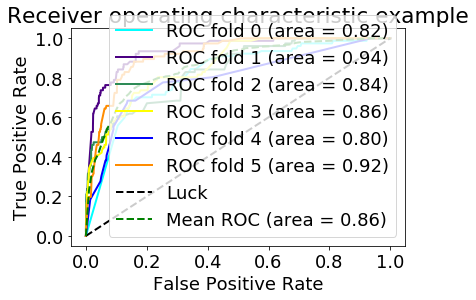

In [73]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
# classifier = svm.SVC(kernel='linear', probability=True,
#                      random_state=random_state)

# classifier = 

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/home/user/env_py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


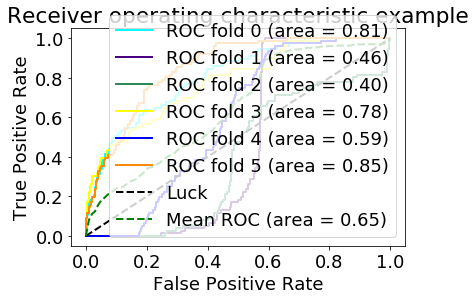

In [76]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
# classifier = svm.SVC(kernel='linear', probability=True,
#                      random_state=random_state)

# classifier = 

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()